In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Read the dataset
mydata = pd.read_csv("D:/data ANALYTICS AND SCIENCE/MARKETING Analytics/softdrinks.csv")
mydata

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,6480,31/01/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5lt,3.10,7056
1,6481,31/01/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,can,330ml,0.85,12490
2,6482,31/01/18,Athens,37.97945,23.71622,664046,shop_1,adult-cola,glass,500ml,0.83,26640
3,6483,31/01/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,glass,500ml,0.54,41892
4,6484,31/01/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5lt,0.83,22923
...,...,...,...,...,...,...,...,...,...,...,...,...
1075,7555,31/12/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5lt,2.52,13760
1076,7556,31/12/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5lt,2.18,16309
1077,7557,31/12/18,Patra,38.24444,21.73444,168034,shop_6,kinder-cola,can,330ml,0.85,24378
1078,7558,31/12/18,Thessaloniki,40.64361,22.93086,354290,shop_4,adult-cola,plastic,1.5lt,2.17,20691


In [4]:
for i in range(len(mydata['capacity'])):
    if 'lt' in str(mydata['capacity'][i]):
        mydata.at[i, 'capacity'] = float(str(mydata['capacity'][i]).replace('lt', '')) * 1000

print(mydata['capacity'])




0       1500.0
1        330ml
2        500ml
3        500ml
4       1500.0
         ...  
1075    1500.0
1076    1500.0
1077     330ml
1078    1500.0
1079     500ml
Name: capacity, Length: 1080, dtype: object


In [6]:
for i in range(len(mydata['capacity'])):
    if 'ml' in str(mydata['capacity'][i]):
        mydata.at[i, 'capacity'] = float(str(mydata['capacity'][i]).replace('ml', ''))

print(mydata['capacity'])

0       1500.0
1        330.0
2        500.0
3        500.0
4       1500.0
         ...  
1075    1500.0
1076    1500.0
1077     330.0
1078    1500.0
1079     500.0
Name: capacity, Length: 1080, dtype: object


In [7]:
# Select columns and preprocess the data
bd_sub = mydata[['city', 'capacity', 'pop', 'price', 'quantity', 'container', 'brand']].copy()
bd_sub['pop'] = StandardScaler().fit_transform(bd_sub['pop'].values.reshape(-1, 1))
bd_sub['capacity'] = pd.to_numeric(bd_sub['capacity'])
bd_sub['capacity'] = StandardScaler().fit_transform(bd_sub['capacity'].values.reshape(-1, 1))
bd_sub['price'] = StandardScaler().fit_transform(bd_sub['price'].values.reshape(-1, 1))
bd_sub['quantity'] = StandardScaler().fit_transform(bd_sub['quantity'].values.reshape(-1, 1))
bd_sub['city'] = bd_sub['city'].astype('category')
bd_sub['container'] = bd_sub['container'].astype('category')
bd_sub['brand'] = bd_sub['brand'].astype('category')

In [9]:
# Sample 100 rows
bd_sub = bd_sub.sample(n=100)
bd_sub

,city,capacity,pop,price,quantity,container,brand
200,Irakleion,-0.867194,-0.948350,-0.963077,0.251444,can,gazoza
877,Larisa,-0.867194,-0.915769,-0.516791,-0.651984,can,adult-cola
1017,Patra,-0.867194,-0.814148,-0.818336,1.515923,NaN,adult-cola
829,Irakleion,-0.538133,-0.948350,-0.299679,-0.104474,glass,orange-power
802,Patra,-0.538133,-0.814148,-0.251432,0.417874,glass,lemon-boost
...,...,...,...,...,...,...,...
658,Patra,1.397520,-0.814148,-0.106691,1.673450,plastic,gazoza
1039,Athens,-0.867194,1.341481,-0.951015,-0.666760,can,kinder-cola
568,Patra,-0.538133,-0.814148,-0.323803,2.691314,glass,adult-cola
687,Athens,-0.867194,1.341481,-1.047509,0.243160,can,lemon-boost


In [36]:
from sklearn.preprocessing import OneHotEncoder

# Convert categorical variables to one-hot encoding
enc = OneHotEncoder(sparse=False)
encoded_features = enc.fit_transform(bd_sub[['city', 'container', 'brand']])
encoded_bd_sub = np.hstack((encoded_features, bd_sub[['capacity', 'pop', 'price', 'quantity']].values))

# Calculate Gower distance
gower_dist = pairwise_distances(encoded_bd_sub, metric='euclidean')
gower_dist
gower_mat = np.asmatrix(gower_dist)
gower_mat

C:\Users\Sayak23\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


matrix([[0.        , 2.41092996, 3.62654785, ..., 2.56503367, 4.11928692,
         1.45016501],
        [2.41092996, 0.        , 2.70906709, ..., 1.67357158, 3.62647708,
         2.43462554],
        [3.62654785, 2.70906709, 0.        , ..., 3.2237634 , 2.0966101 ,
         3.6275897 ],
        ...,
        [2.56503367, 1.67357158, 3.2237634 , ..., 0.        , 3.90032423,
         2.49998654],
        [4.11928692, 3.62647708, 2.0966101 , ..., 3.90032423, 0.        ,
         3.83002912],
        [1.45016501, 2.43462554, 3.6275897 , ..., 2.49998654, 3.83002912,
         0.        ]])

city              Athens
capacity       -0.867194
pop             1.341481
price           -0.78215
quantity       -0.784967
container            can
brand        lemon-boost
Name: 872, dtype: object
city            Patra
capacity    -0.867194
pop         -0.814148
price       -1.095757
quantity     2.711345
container         can
brand          gazoza
Name: 210, dtype: object


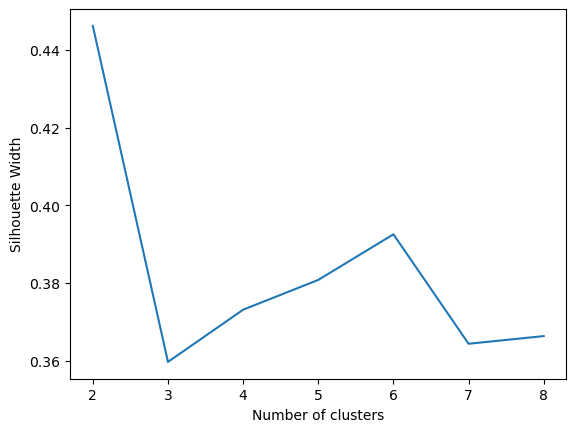

In [30]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# Print most similar/dissimilar clients
min_dis = np.min(gower_mat[gower_mat != 0])
min_index = np.where(gower_mat == min_dis)
print(bd_sub.iloc[min_index[0][0], :])

max_dis = np.max(gower_mat)
max_index = np.where(gower_mat == max_dis)
print(bd_sub.iloc[max_index[0][0], :])

# Calculate silhouette width
sil_width = []
for i in range(2, 9):
    kmeans_fit = KMeans(n_clusters=i, random_state=0).fit(gower_dist)
    sil_width.append(silhouette_score(gower_dist, kmeans_fit.labels_))

plt.plot(range(2, 9), sil_width)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Width")
plt.show()


In [35]:
# Summary of each cluster
k = 3
pam_fit = KMeans(n_clusters=k).fit(gower_dist)
pam_results = bd_sub.copy()
pam_results['cluster'] = pam_fit.labels_

# Add categorical variables to the groupby operation
pam_results = pam_results.groupby(['cluster', 'brand', 'city']).apply(lambda x: x.describe())
print(pam_results)



                                   capacity       pop     price  quantity  \
cluster brand        city                                                   
0       adult-cola   Athens count  5.000000  5.000000  5.000000  5.000000   
                            mean   1.397520  1.341481  1.492701 -0.693109   
                            std    0.000000  0.000000  0.706443  0.244035   
                            min    1.397520  1.341481  0.629078 -1.071025   
                            25%    1.397520  1.341481  1.256290 -0.753622   
...                                     ...       ...       ...       ...   
2       orange-power Athens min   -0.867194  1.341481 -1.011324 -0.705462   
                            25%   -0.620398  1.341481 -0.640425 -0.188694   
                            50%   -0.538133  1.341481 -0.462513  0.017411   
                            75%   -0.538133  1.341481 -0.338880  0.381614   
                            max   -0.538133  1.341481 -0.130814  1.372678   

ANALYSIS ::::::

Cluster 0:

Capacity: The average capacity of products in this cluster is 1.397520, with no variation (std = 0). The minimum capacity is also 1.397520. This suggests that products in this cluster have a consistent capacity.
Popularity: The average popularity is 1.341481, with no variation (std = 0). This indicates that products in this cluster have a similar level of popularity.
Price: The average price is 1.492701, with a moderate variation (std = 0.706443). The minimum price is 0.629078. This cluster may include products with relatively higher prices compared to other clusters.
Quantity: The average quantity is -0.693109, with a moderate variation (std = 0.244035). The minimum quantity is -1.071025. This cluster may contain products with lower quantities compared to other clusters.


Cluster 1:

This cluster does not have any specific information provided in the given table. It might be worth investigating why there is no statistical information available for this cluster.


Cluster 2:

Capacity: The average capacity of products in this cluster is -0.694279, with a moderate variation (std = 0.225315). The minimum capacity is -0.868041. Products in this cluster may have a relatively lower capacity compared to other clusters.
Popularity: The average popularity is 1.341481, with no variation (std = 0). This indicates that products in this cluster have a similar level of popularity.
Price: The average price is -0.898150, with a moderate variation (std = 0.346110). The minimum price is -1.011324. Products in this cluster may have relatively lower prices compared to other clusters.
Quantity: The average quantity is -0.627487, with a moderate variation (std = 0.487334). The minimum quantity is -1.367456. This cluster may contain products with lower quantities compared to other clusters.

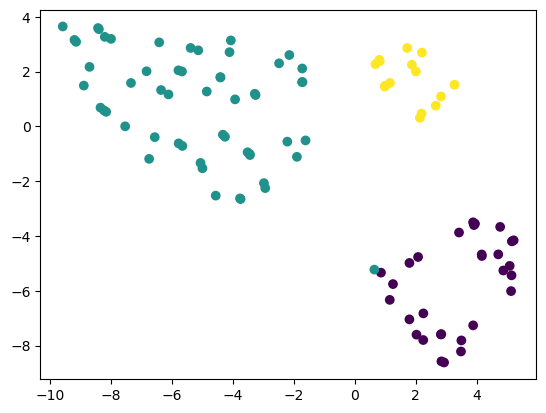

In [42]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform t-SNE embedding
tsne_obj = TSNE(n_components=2, random_state=0)
tsne_data = tsne_obj.fit_transform(encoded_bd_sub)

# Create a DataFrame for the t-SNE results
tsne_data = pd.DataFrame(tsne_data, columns=['X', 'Y'])
tsne_data['cluster'] = pd.Series(pam_fit.labels_)

# Scatter plot of t-SNE results
plt.scatter(tsne_data['X'], tsne_data['Y'], c=tsne_data['cluster'])
plt.show()


In [44]:
# Calculate brand counts within each cluster
bd_sub['cluster'] = pam_fit.labels_

# Calculate brand counts within each cluster
brand_counts = bd_sub.groupby(['cluster', 'brand']).size().reset_index(name='count')

# Identify the most favored brand in each cluster
most_favored_brands = brand_counts.groupby('cluster').apply(lambda x: x.loc[x['count'].idxmax()])

print(most_favored_brands)


         cluster         brand  count
cluster                              
0              0    adult-cola      8
1              1  orange-power     15
2              2    adult-cola      4
